# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Testing and Training Files

In [8]:
%cd '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Projects/digit-recognizer'
_train = pd.read_csv('data/train.csv')
_test = pd.read_csv('data/test.csv')


/content/drive/MyDrive/Colab Notebooks/Machine Learning/Projects/digit-recognizer


In [9]:
_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
sns.set(palette="Paired")
plt.rcParams['figure.dpi'] = 120
train_y=_train['label']
train_x=train.drop(labels = ["label"],axis = 1)
train_y.head()

,label
0,1
1,0
2,1
3,4
4,0


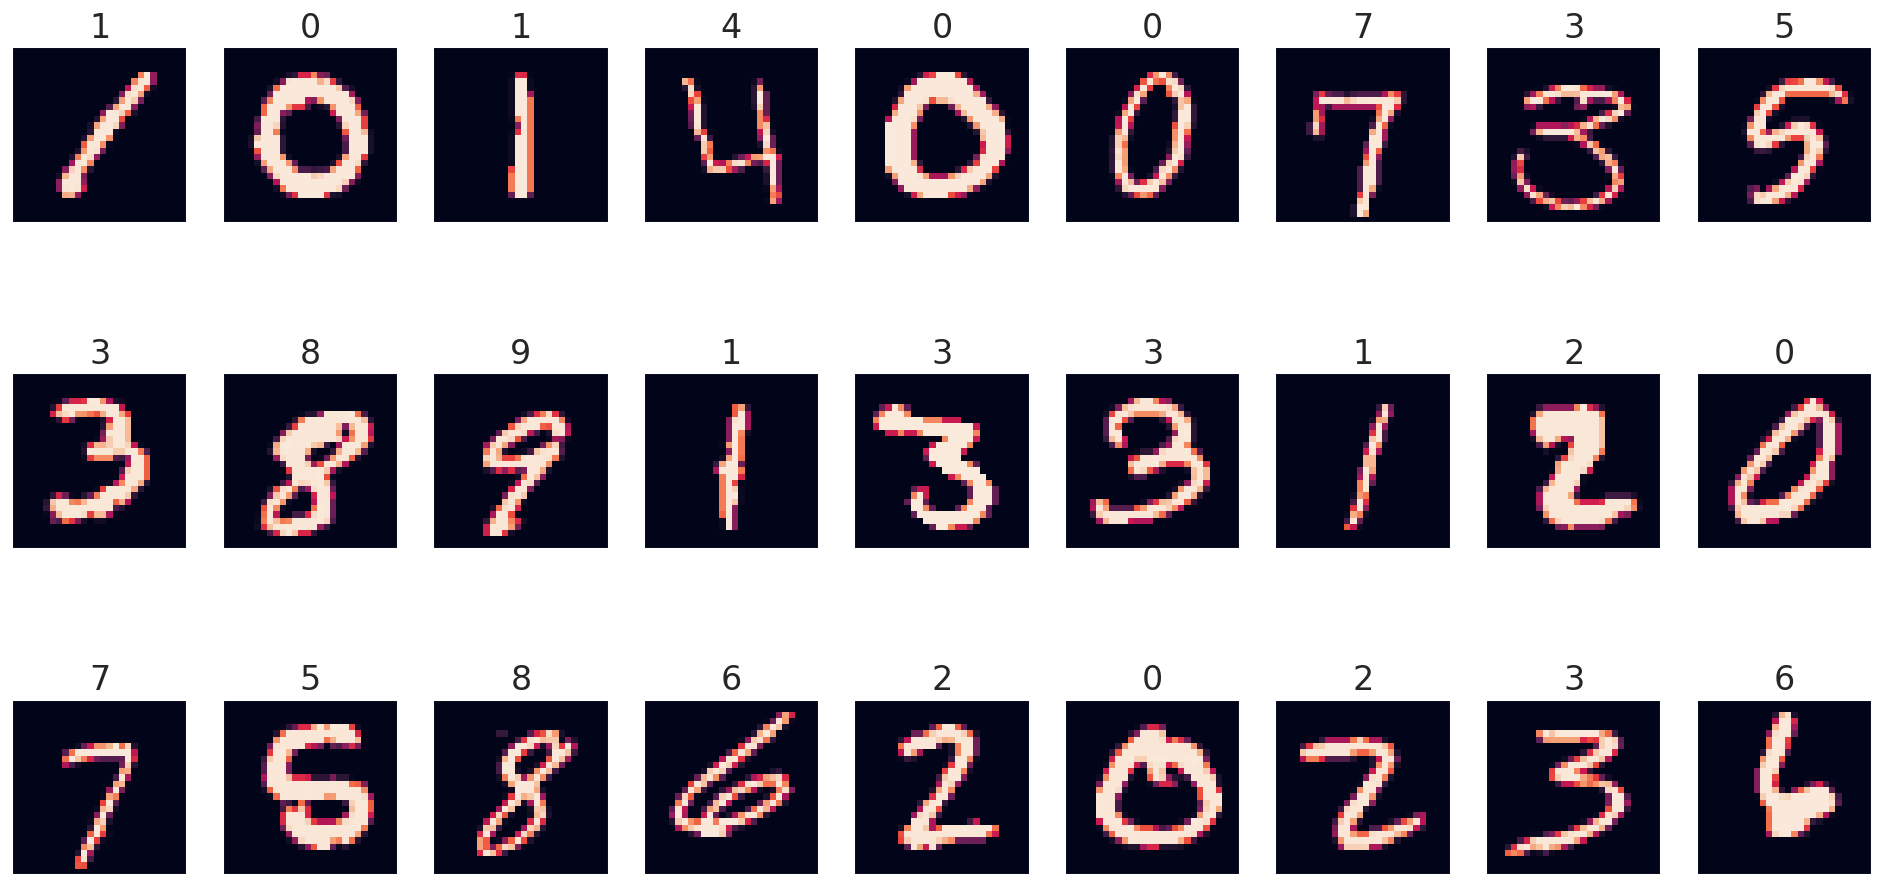

In [12]:
plt.figure(figsize=(20, 10))
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x.iloc[i].to_numpy().reshape((28,28,1)))
    plt.title(train_y[i],size = 20)
plt.show()

In [13]:
train_x = train_x/255.0
test = _test/255.0
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 784)
Test Shape     :  (42000,)


In [14]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 28, 28, 1)
Test Shape     :  (42000,)


In [15]:
x_train,x_val,y_train,y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state = 12345)

In [16]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

# Model Creation

In [17]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])

# Fitting the Model

In [19]:
history = model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=30,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - accuracy: 0.3886 - loss: 1.8401 - val_accuracy: 0.8668 - val_loss: 0.4783
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.8140 - loss: 0.5660 - val_accuracy: 0.9262 - val_loss: 0.2609
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 443ms/step - accuracy: 0.8792 - loss: 0.3663 - val_accuracy: 0.9505 - val_loss: 0.1816
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.9171 - loss: 0.2678 - val_accuracy: 0.9617 - val_loss: 0.1331
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 457ms/step - accuracy: 0.9306 - loss: 0.2178 - val_accuracy: 0.9668 - val_loss: 0.1115
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 494ms/step - accuracy: 0.9450 - loss: 0.1784 - val_accuracy: 0.9708 - val_loss: 0.0960
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 441ms/step - accuracy: 0.9498 - loss: 0.1614 - val_accuracy: 0.9745 - val_loss: 0.0837
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.9559 - loss: 0.1440 - val_accu

In [20]:
print('Loss     : {} \nAccuracy : {}'.format(history.history['loss'][-1],history.history['accuracy'][-1]))

Loss     : 0.049565546214580536 
Accuracy : 0.9844345450401306


# Validation Predictions

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


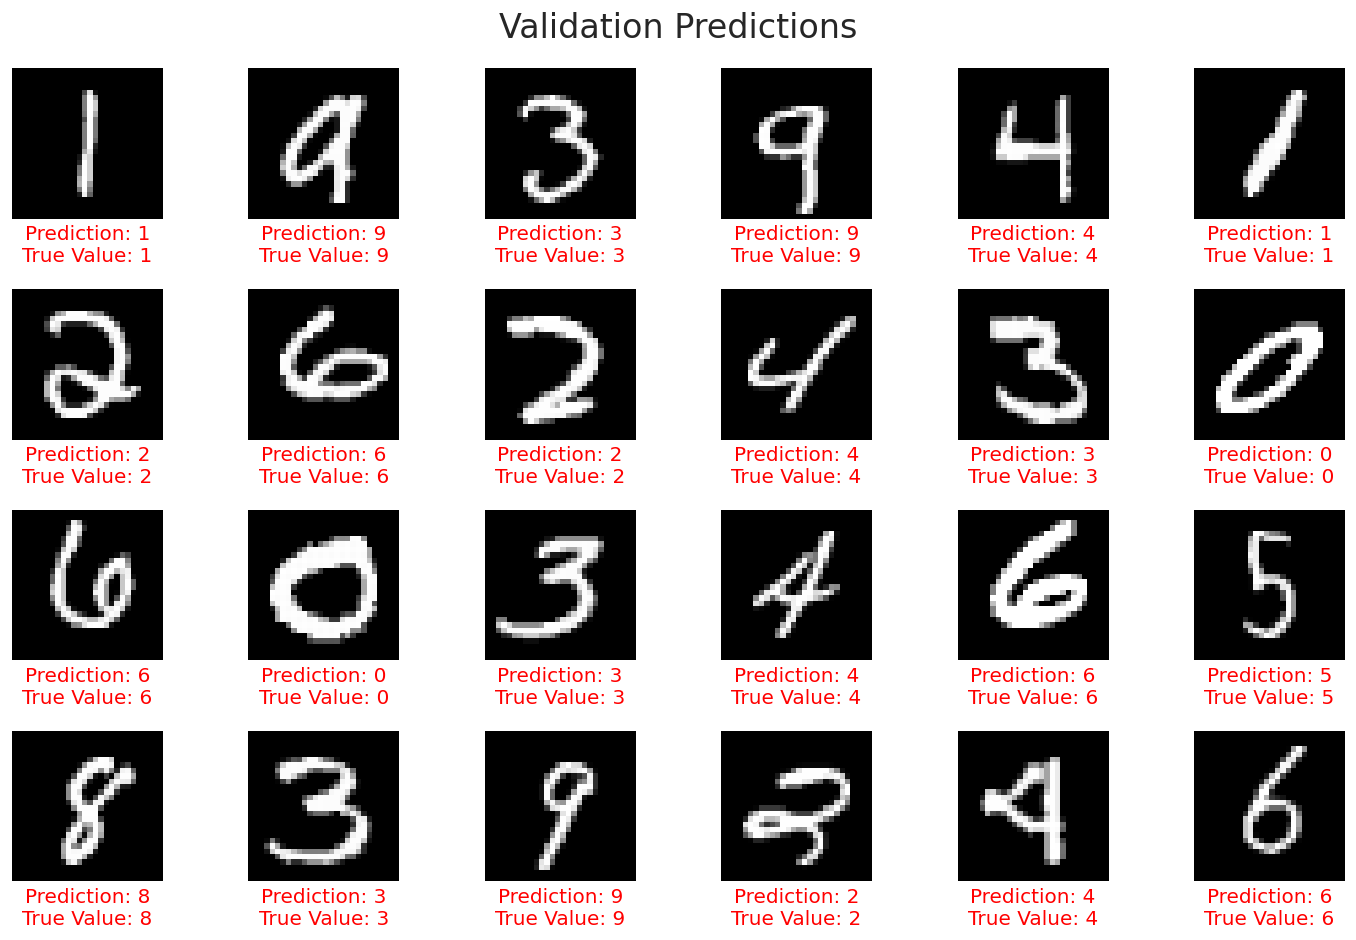

In [21]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.array(y_val)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Validation Predictions", fontsize=20)
for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    img = x_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="red")
f.tight_layout()

f.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


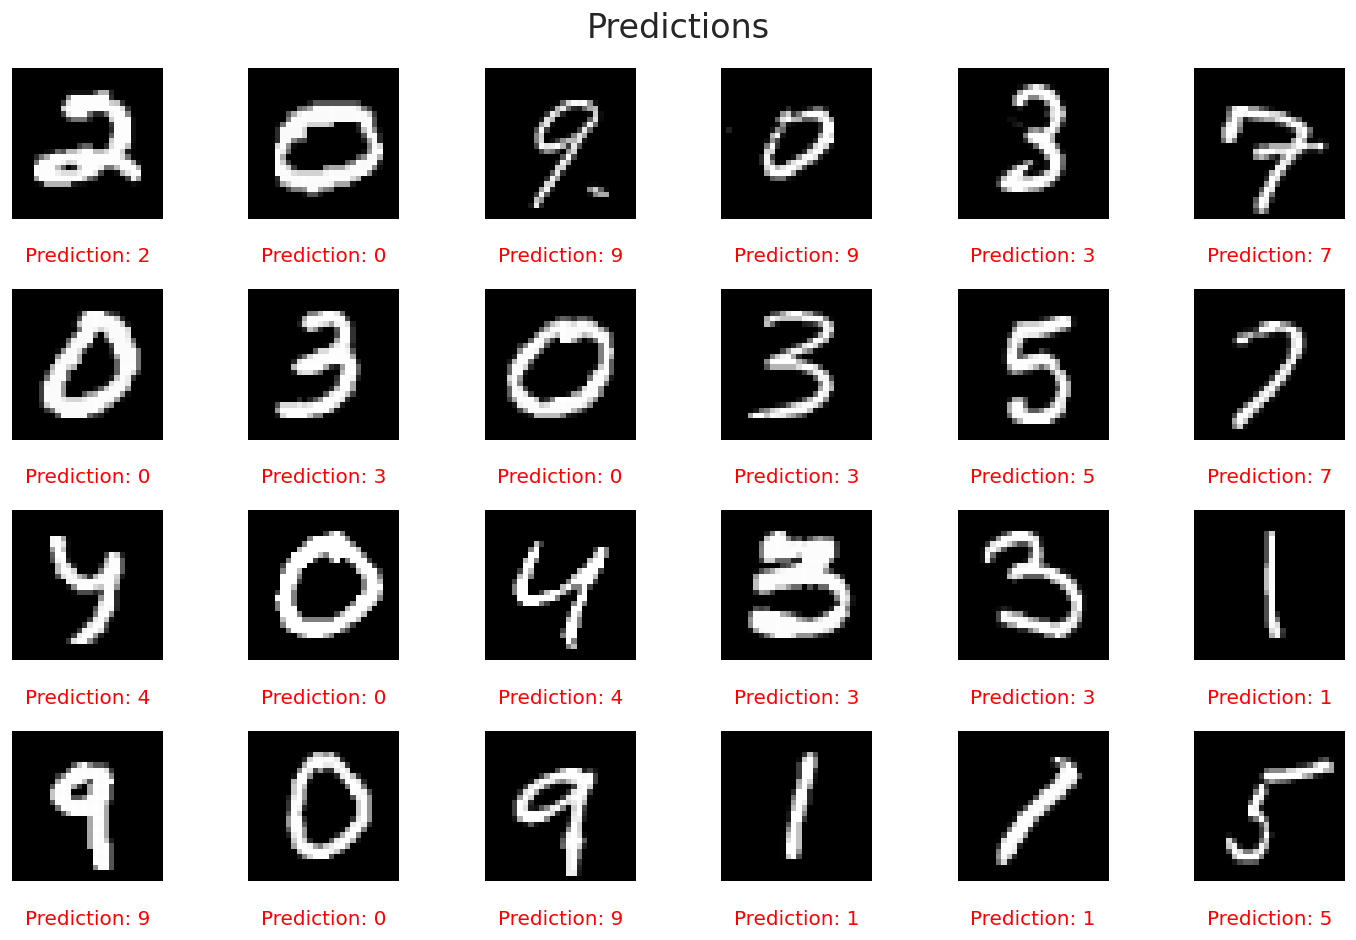

In [23]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    img = test[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}".format(Y_pred_classes[i]),
              y=-0.35,color="red")
f.tight_layout()

f.show()

In [25]:
submission = pd.DataFrame({'ImageId': range(1,28001), 'Label': Y_pred_classes})
submission.to_csv('cnn_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Running this on Kaggle provided 98.753% accuracy